<a href="https://colab.research.google.com/github/jennlee0102/preview/blob/main/AI_17_%EC%9D%B4%EC%9E%AC%EC%9D%80_section2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install eli5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# pandas
import pandas as pd

# numpy
import numpy as np
from numpy import linalg

# matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import matplotlib.font_manager as fm
from matplotlib.ticker import LinearLocator

# scipy
from scipy import stats
from scipy.stats import skew, kurtosis
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cut_tree
from scipy.misc import derivative

# statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot

# scikit-learn
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet,RidgeCV, LassoCV, ElasticNetCV, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, plot_confusion_matrix, confusion_matrix, \
  classification_report, recall_score, precision_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

# eli5
import eli5
from eli5.sklearn import PermutationImportance

# others
import folium
from folium.plugins import HeatMap
import graphviz
from xgboost import XGBClassifier
import re
import math
import seaborn as sns
from category_encoders import OrdinalEncoder
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

### Used Dataset
1. Rat sighting dataset from https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

2. average income by borough from https://data.cccnewyork.org/data/table/66/median-incomes#66/107/62/a/a

3. population density by borough from http://www.citypopulation.de/en/usa/newyorkcity/

# Will I encounter rodent in NYC?

1. Define a problem and the reason of the topic: <br>
- Rodent issue is arising in NYC and the city mayor is struglling with removing the rats in the city. Let's find out the possibility to encounter the rat by any chance.<br>
- A rat problem: Curbside overnight garbage disposal from residences, stores, subway and restaurants, as well as littering, contribute to the sustenance of the city's rats. Rats nearly always use the same routes to their food sources. Rat infestations have increased as a result of budget reductions and more wasteful disposal of food. [wikipedia](https://en.wikipedia.org/wiki/Rats_in_New_York_City#:~:text=Curbside%20overnight%20garbage%20disposal%20from,more%20wasteful%20disposal%20of%20food.)

- And then we need to figure out which season the rats are most active so NYC can deal with it before the rats are infested.<br>

- residence: residential area:1, non_residential:0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/project/processed_311_Service_Requests_from_2010_to_Present.csv')
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,descriptor,created_date,location_type,incident_zip,incident_address,city,status,borough,latitude,longitude
0,Rat Sighting,01/18/2023 09:56:24 PM,3+ Family Apt. Building,10025.0,234 WEST 108 STREET,NEW YORK,Closed,MANHATTAN,40.802252,-73.965997
1,Rat Sighting,01/18/2023 07:37:32 AM,3+ Family Apt. Building,11237.0,618 IRVING AVENUE,BROOKLYN,Closed,BROOKLYN,40.692512,-73.902968
2,Rat Sighting,01/18/2023 04:15:20 PM,1-2 Family Dwelling,10308.0,249 LINDENWOOD ROAD,STATEN ISLAND,Closed,STATEN ISLAND,40.544093,-74.149923
3,Rat Sighting,01/24/2023 10:10:45 PM,Construction Site,10024.0,117 WEST 79 STREET,NEW YORK,Closed,MANHATTAN,40.782276,-73.976229
4,Mouse Sighting,01/18/2023 09:23:56 PM,3+ Family Apt. Building,10026.0,95 WEST 119 STREET,NEW YORK,In Progress,MANHATTAN,40.803802,-73.947881
...,...,...,...,...,...,...,...,...,...,...
138617,Rat Sighting,01/18/2023 08:45:32 AM,Vacant Building,11213.0,LINCOLN PLACE,NaN,In Progress,BROOKLYN,NaN,NaN
138618,Rat Sighting,01/18/2023 04:21:45 AM,Other (Explain Below),11220.0,314 59 STREET,BROOKLYN,In Progress,BROOKLYN,40.642239,-74.019195
138619,Signs of Rodents,01/18/2023 09:36:07 AM,3+ Family Mixed Use Building,11368.0,35-13 109 STREET,CORONA,In Progress,QUEENS,40.755220,-73.859095
138620,Rat Sighting,01/25/2023 10:38:50 AM,1-2 Family Dwelling,11233.0,253 SARATOGA AVENUE,BROOKLYN,In Progress,BROOKLYN,40.677352,-73.916388


## EDA & Feature Engineering

In [ ]:
df.borough.unique()

array(['MANHATTAN', 'BROOKLYN', 'STATEN ISLAND', 'BRONX', 'QUEENS',
       'Unspecified', nan], dtype=object)

In [ ]:
# check nulls
df.isnull().sum()

descriptor             0
created_date           0
location_type         18
incident_zip          35
incident_address     484
city                3701
status                 0
borough                3
latitude            1583
longitude           1583
dtype: int64

In [ ]:
# drop location_type nulls
null_drop = df[(df['location_type'].isna()) | (df['borough'].isna())]
df.drop(index=null_drop.index, inplace=True)
# drop incident_address nulls
drop = df[df['incident_address'].isna()]
df.drop(index=drop.index, inplace=True)
df.head()

,descriptor,created_date,location_type,incident_zip,incident_address,city,status,borough,latitude,longitude
0,Rat Sighting,01/18/2023 09:56:24 PM,3+ Family Apt. Building,10025.0,234 WEST 108 STREET,NEW YORK,Closed,MANHATTAN,40.802252,-73.965997
1,Rat Sighting,01/18/2023 07:37:32 AM,3+ Family Apt. Building,11237.0,618 IRVING AVENUE,BROOKLYN,Closed,BROOKLYN,40.692512,-73.902968
2,Rat Sighting,01/18/2023 04:15:20 PM,1-2 Family Dwelling,10308.0,249 LINDENWOOD ROAD,STATEN ISLAND,Closed,STATEN ISLAND,40.544093,-74.149923
3,Rat Sighting,01/24/2023 10:10:45 PM,Construction Site,10024.0,117 WEST 79 STREET,NEW YORK,Closed,MANHATTAN,40.782276,-73.976229
4,Mouse Sighting,01/18/2023 09:23:56 PM,3+ Family Apt. Building,10026.0,95 WEST 119 STREET,NEW YORK,In Progress,MANHATTAN,40.803802,-73.947881


In [ ]:
# 1. first preprocessing: fillna
df["incident_zip"].fillna(df["incident_zip"].mode()[0],inplace=True)
df["city"].fillna(df["city"].mode()[0],inplace=True)
df["latitude"].fillna(df["latitude"].mean(),inplace=True)
df["longitude"].fillna(df["longitude"].mean(),inplace=True)

df.isnull().sum()

descriptor          0
created_date        0
location_type       0
incident_zip        0
incident_address    0
city                0
status              0
borough             0
latitude            0
longitude           0
dtype: int64

In [ ]:
df.descriptor.unique()

array(['Rat Sighting', 'Mouse Sighting', 'Condition Attracting Rodents',
       'Signs of Rodents', 'Rodent Bite - PCS Only'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138118 entries, 0 to 138621
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   descriptor        138118 non-null  object 
 1   created_date      138118 non-null  object 
 2   location_type     138118 non-null  object 
 3   incident_zip      138118 non-null  float64
 4   incident_address  138118 non-null  object 
 5   city              138118 non-null  object 
 6   status            138118 non-null  object 
 7   borough           138118 non-null  object 
 8   latitude          138118 non-null  float64
 9   longitude         138118 non-null  float64
dtypes: float64(3), object(7)
memory usage: 11.6+ MB


In [ ]:
# 2. second preprocessing: extract data that I will use
# drop columns
df.drop(columns='incident_address',axis=1)

# drop rows with the unspecified borough
df=df[df['borough']!='Unspecified']

# zipcode dtype change to int
df=df.astype({'incident_zip':'object'})

# create month column and then mapping to season
df['incident_date'] = pd.to_datetime(df['created_date'])
df['incident_year'] = df['incident_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month

# borough code
borocode = {'BROOKLYN':3, 'MANHATTAN':1, 'BRONX':2, 'QUEENS':4, 'STATEN ISLAND':5} 
df['boro_code'] = df['borough'].map(borocode)

# spring (March-May), summer (June-August), autumn (September-November) and winter (December-February)
initial_dict = {12.0:'winter', 1.0:'winter', 2.0:'winter', 3.0:'spring', 4.0:'spring', 5.0:'spring',
                6.0:'summer', 7.0:'summer', 8.0:'summer', 9.0:'autumn', 10.0:'autumn', 11.0:'autumn'}
df['season'] = df['incident_month'].map(initial_dict)

# # target=temperature
# initial_dict1 = {12.0:'cold', 1.0:'cold', 2.0:'cold', 3.0:'cold', 4.0:'cold', 5.0:'hot',
#                 6.0:'hot', 7.0:'hot', 8.0:'hot', 9.0:'hot', 10.0:'hot', 11.0:'cold'}
# df['temp'] = df['incident_month'].map(initial_dict1)

# average income by borough
# income = {'BROOKLYN':2, 'MANHATTAN':5, 'BRONX':1, 'QUEENS':3, 'STATEN ISLAND':4}
income = {'BROOKLYN':66937, 'MANHATTAN':93651, 'BRONX':41432, 'QUEENS':73696, 'STATEN ISLAND':89821}
df['avg_income'] = df['borough'].map(income)

# population density by borough
# (14,698 + 26,873 + 13,046 + 8,278 + 3,312)/5=13241
# density = {'BROOKLYN':4, 'MANHATTAN':5, 'BRONX':3, 'QUEENS':2, 'STATEN ISLAND':1}
density = {'BROOKLYN':14698, 'MANHATTAN':26873, 'BRONX':13046, 'QUEENS':8278, 'STATEN ISLAND':3312}
df['density'] = df['borough'].map(density)

df.head()

,descriptor,created_date,location_type,incident_zip,incident_address,city,status,borough,latitude,longitude,incident_date,incident_year,incident_month,boro_code,season,avg_income,density
0,Rat Sighting,01/18/2023 09:56:24 PM,3+ Family Apt. Building,10025.0,234 WEST 108 STREET,NEW YORK,Closed,MANHATTAN,40.802252,-73.965997,2023-01-18 21:56:24,2023,1,1,winter,93651,26873
1,Rat Sighting,01/18/2023 07:37:32 AM,3+ Family Apt. Building,11237.0,618 IRVING AVENUE,BROOKLYN,Closed,BROOKLYN,40.692512,-73.902968,2023-01-18 07:37:32,2023,1,3,winter,66937,14698
2,Rat Sighting,01/18/2023 04:15:20 PM,1-2 Family Dwelling,10308.0,249 LINDENWOOD ROAD,STATEN ISLAND,Closed,STATEN ISLAND,40.544093,-74.149923,2023-01-18 16:15:20,2023,1,5,winter,89821,3312
3,Rat Sighting,01/24/2023 10:10:45 PM,Construction Site,10024.0,117 WEST 79 STREET,NEW YORK,Closed,MANHATTAN,40.782276,-73.976229,2023-01-24 22:10:45,2023,1,1,winter,93651,26873
4,Mouse Sighting,01/18/2023 09:23:56 PM,3+ Family Apt. Building,10026.0,95 WEST 119 STREET,NEW YORK,In Progress,MANHATTAN,40.803802,-73.947881,2023-01-18 21:23:56,2023,1,1,winter,93651,26873


In [ ]:
df.duplicated().sum()

250

In [ ]:
# drop duplicates
df_clean = df.copy()
df_clean = df_clean.drop_duplicates()
df_clean.shape[0]

137862

In [ ]:
df.nunique()

descriptor               5
created_date        134444
location_type           54
incident_zip           197
incident_address     66437
city                    91
status                   4
borough                  5
latitude             67852
longitude            67852
incident_date       134444
incident_year            5
incident_month          12
boro_code                5
season                   4
avg_income               5
density                  5
dtype: int64

In [ ]:
df.descriptor.unique()

array(['Rat Sighting', 'Mouse Sighting', 'Condition Attracting Rodents',
       'Signs of Rodents', 'Rodent Bite - PCS Only'], dtype=object)

In [ ]:
# residence
# single: 'Single Room Occupancy (SRO)', 
# 1-3 family dwelling: '1-2 Family Dwelling','1-3 Family Dwelling', '1-2 FamilyDwelling',  'Private Residence','Private House',
# 1-3 family building: '1-2 Family Mixed Use Building', '1-3 Family Mixed Use Building', 'Residential Building','Apartment','Residential Property',
# 3+ family apt: ‘3+ Family Apt. Building’, '3+ Family Mixed Use Building', 'Other (Explain Below)', '3+ Family Apartment Building’,'Residence', '3+Family Apt.', '3+ Family Apt','3+ Family Apt.','3+ Family',

# non-residence
# restaurants: 'Restaurant/Bar/Deli/Bakery','Catering Service','Grocery Store','Cafeteria - College/University’,’Restaurant’,'Cafeteria - Public School',
# building: 'Office Building', 'Government Building', 'School/Pre-School','Building (Non-Residential)','Summer Camp’,'Commercial Building','School',  
# hospital: 'Hospital', 'Day Care/Nursery',
# public: 'Parking Lot/Garage', 'Public Garden', 'Public Stairs','Street Area', 'Beach', 'Public/Unfenced Area', 'Ground', 'Retail Store','Street Vendor', 'Street Fair Vendor’,'Catch Basin/Sewer'
# others: 'Construction Site', 'Vacant Building','Vacant Lot','Abandoned Building', 'Other’,’Vacant Lot/Property','Store', 'Commercial Property', 'Construction Site',

In [ ]:
# replace location_type data to two unique data (residential/non residential) and set the residential column as target
residence=['Single Room Occupancy (SRO)','1-2 Family Dwelling','1-3 Family Dwelling','1-2 FamilyDwelling',
           'Private Residence','Private House','1-2 Family Mixed Use Building','1-3 Family Mixed Use Building',
           'Residential Building','Apartment','Residential Property','3+ Family Mixed Use Building','Other (Explain Below)',
           '3+ Family Apartment Building','Residence','3+Family Apt.','3+ Family Apt','3+ Family Apt.','3+ Family']

non_residence=['Restaurant/Bar/Deli/Bakery','Catering Service','Grocery Store','Cafeteria - College/University','Restaurant',
               'Cafeteria - Public School','Office Building','Government Building','School/Pre-School','Building (Non-Residential)',
               'Summer Camp','Commercial Building','School','Hospital','Day Care/Nursery','Parking Lot/Garage','Public Garden',
               'Public Stairs','Street Area','Beach','Public/Unfenced Area','Ground','Retail Store','Street Vendor',
               'Street Fair Vendor','Catch Basin/Sewer','Construction Site','Vacant Building','Vacant Lot','Abandoned Building',
               'Other','Vacant Lot/Property','Store','Commercial Property','Construction Site']

df['residence']=np.where(df['location_type'].isin(residence),1,0)

df

,descriptor,created_date,location_type,incident_zip,incident_address,city,status,borough,latitude,longitude,incident_date,incident_year,incident_month,boro_code,season,avg_income,density,residence
0,Rat Sighting,01/18/2023 09:56:24 PM,3+ Family Apt. Building,10025.0,234 WEST 108 STREET,NEW YORK,Closed,MANHATTAN,40.802252,-73.965997,2023-01-18 21:56:24,2023,1,1,winter,93651,26873,0
1,Rat Sighting,01/18/2023 07:37:32 AM,3+ Family Apt. Building,11237.0,618 IRVING AVENUE,BROOKLYN,Closed,BROOKLYN,40.692512,-73.902968,2023-01-18 07:37:32,2023,1,3,winter,66937,14698,0
2,Rat Sighting,01/18/2023 04:15:20 PM,1-2 Family Dwelling,10308.0,249 LINDENWOOD ROAD,STATEN ISLAND,Closed,STATEN ISLAND,40.544093,-74.149923,2023-01-18 16:15:20,2023,1,5,winter,89821,3312,1
3,Rat Sighting,01/24/2023 10:10:45 PM,Construction Site,10024.0,117 WEST 79 STREET,NEW YORK,Closed,MANHATTAN,40.782276,-73.976229,2023-01-24 22:10:45,2023,1,1,winter,93651,26873,0
4,Mouse Sighting,01/18/2023 09:23:56 PM,3+ Family Apt. Building,10026.0,95 WEST 119 STREET,NEW YORK,In Progress,MANHATTAN,40.803802,-73.947881,2023-01-18 21:23:56,2023,1,1,winter,93651,26873,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138617,Rat Sighting,01/18/2023 08:45:32 AM,Vacant Building,11213.0,LINCOLN PLACE,BROOKLYN,In Progress,BROOKLYN,40.735201,-73.933557,2023-01-18 08:45:32,2023,1,3,winter,66937,14698,0
138618,Rat Sighting,01/18/2023 04:21:45 AM,Other (Explain Below),11220.0,314 59 STREET,BROOKLYN,In Progress,BROOKLYN,40.642239,-74.019195,2023-01-18 04:21:45,2023,1,3,winter,66937,14698,1
138619,Signs of Rodents,01/18/2023 09:36:07 AM,3+ Family Mixed Use Building,11368.0,35-13 109 STREET,CORONA,In Progress,QUEENS,40.755220,-73.859095,2023-01-18 09:36:07,2023,1,4,winter,73696,8278,1
138620,Rat Sighting,01/25/2023 10:38:50 AM,1-2 Family Dwelling,11233.0,253 SARATOGA AVENUE,BROOKLYN,In Progress,BROOKLYN,40.677352,-73.916388,2023-01-25 10:38:50,2023,1,3,winter,66937,14698,1


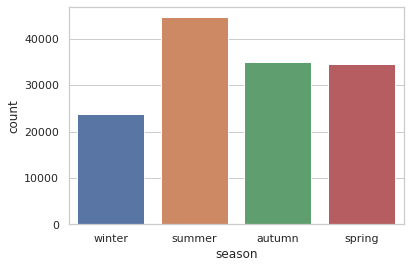

In [ ]:
sns.set_theme(style="whitegrid") ## figure, axes 스타일
sns.countplot(x="season", data=df)

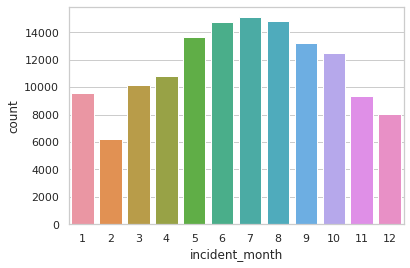

In [ ]:
sns.set_theme(style="whitegrid") ## figure, axes 스타일
sns.countplot(x="incident_month", data=df)

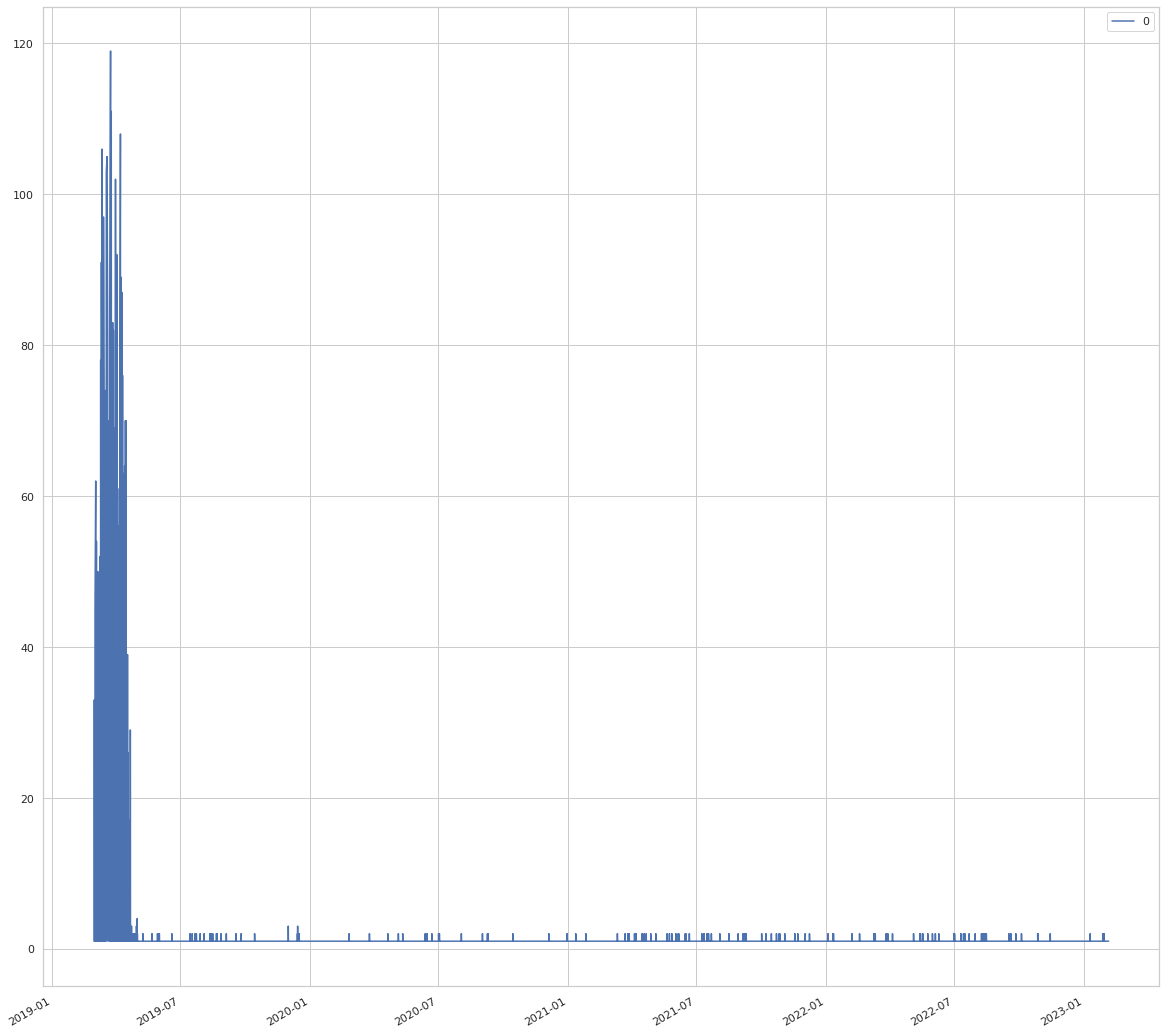

In [ ]:
import datetime
created_dates_df = []
for index in df['created_date'].index:
    created_dates_df.append(datetime.datetime.strptime(df['created_date'][index], "%m/%d/%Y %I:%M:%S %p"))

Date_counts_df = Counter(created_dates_df)
Created_dates_frame = pd.DataFrame.from_dict(Date_counts_df, orient='index')
Created_dates_frame.plot(kind='line', figsize = (20,20))

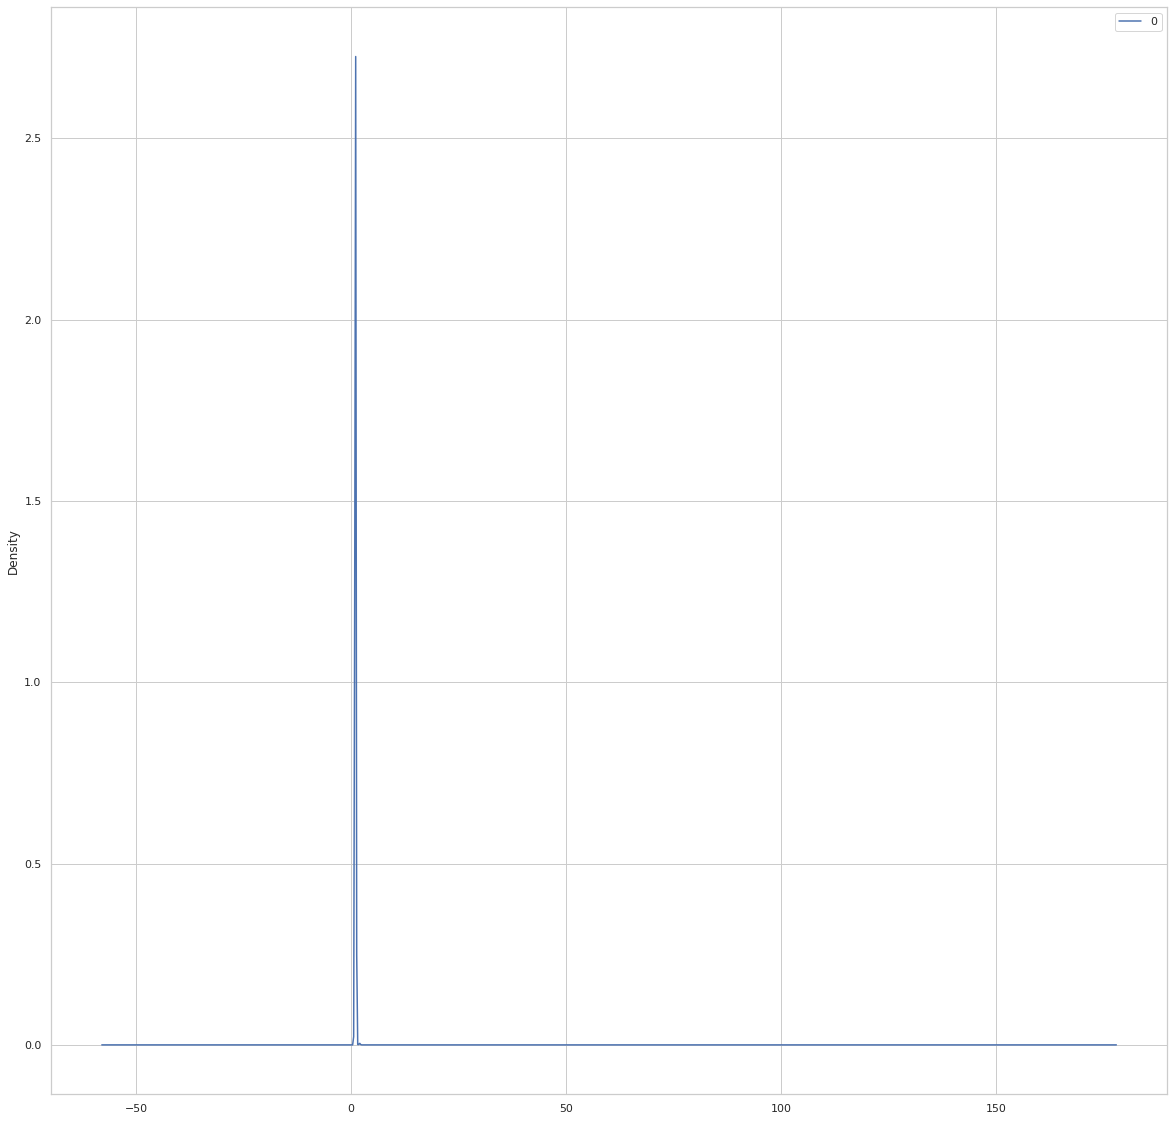

In [ ]:
Created_dates_frame.plot(kind='kde', figsize = (20,20))

the reappearance of rats are rare.

Total cases in 2019 were = 27226


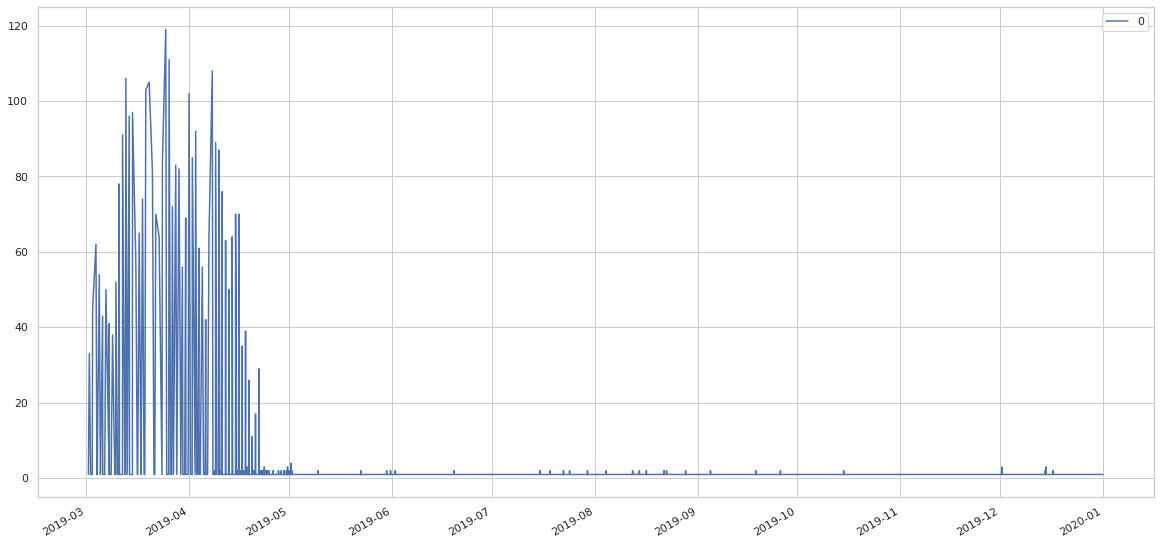

In [ ]:
Created_time = []
dateA = datetime.datetime.strptime('01/01/2019 12:00:00 AM', "%m/%d/%Y %I:%M:%S %p")
dateB = datetime.datetime.strptime('01/01/2020 12:00:00 AM', "%m/%d/%Y %I:%M:%S %p")
for index in df['created_date'].index:
    date = datetime.datetime.strptime(df['created_date'][index], "%m/%d/%Y %I:%M:%S %p")
    if (date >= dateA and date <= dateB):
        Created_time.append(date)
Date_counts = Counter(Created_time)
Created_dates_frame = pd.DataFrame.from_dict(Date_counts, orient='index')
Created_dates_frame.plot(kind='line', figsize = (20,10))
quantity = len(Created_time) # KOLICHESTVO SLUCHEV V 2010 2011
print('Total cases in 2019 were = ' + str(quantity) )

Total cases in 2020 were = 27580


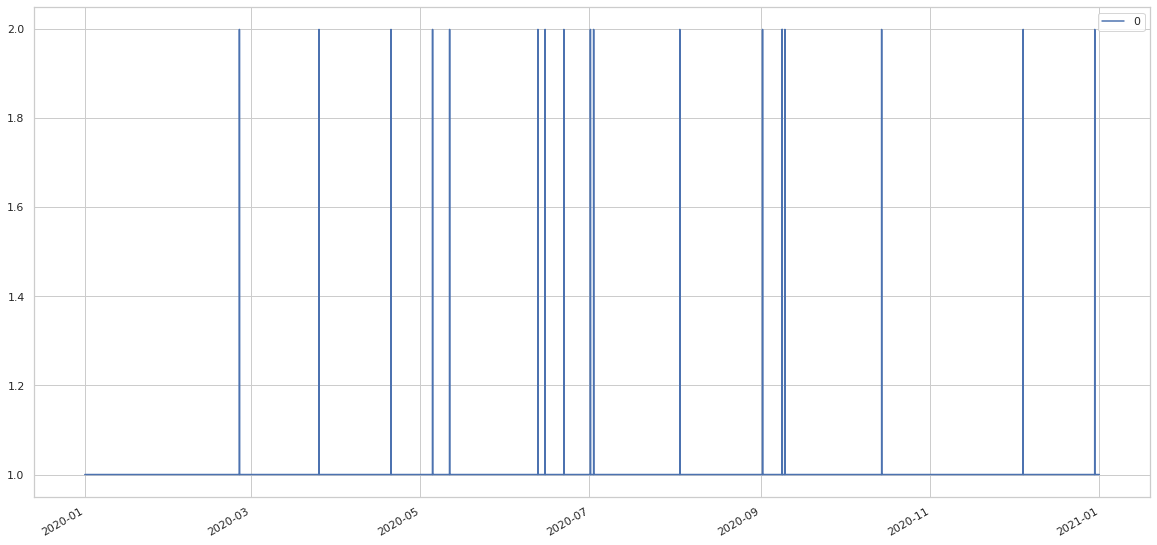

In [ ]:
Created_time = []
dateA = datetime.datetime.strptime('01/01/2020 12:00:00 AM', "%m/%d/%Y %I:%M:%S %p")
dateB = datetime.datetime.strptime('01/01/2021 12:00:00 AM', "%m/%d/%Y %I:%M:%S %p")
for index in df['created_date'].index:
    date = datetime.datetime.strptime(df['created_date'][index], "%m/%d/%Y %I:%M:%S %p")
    if (date >= dateA and date <= dateB):
        Created_time.append(date)
Date_counts = Counter(Created_time)
Created_dates_frame = pd.DataFrame.from_dict(Date_counts, orient='index')
Created_dates_frame.plot(kind='line', figsize = (20,10))
quantity = len(Created_time) # KOLICHESTVO SLUCHEV V 2010 2011
print('Total cases in 2020 were = ' + str(quantity) )

Total cases in 2021 were = 38806


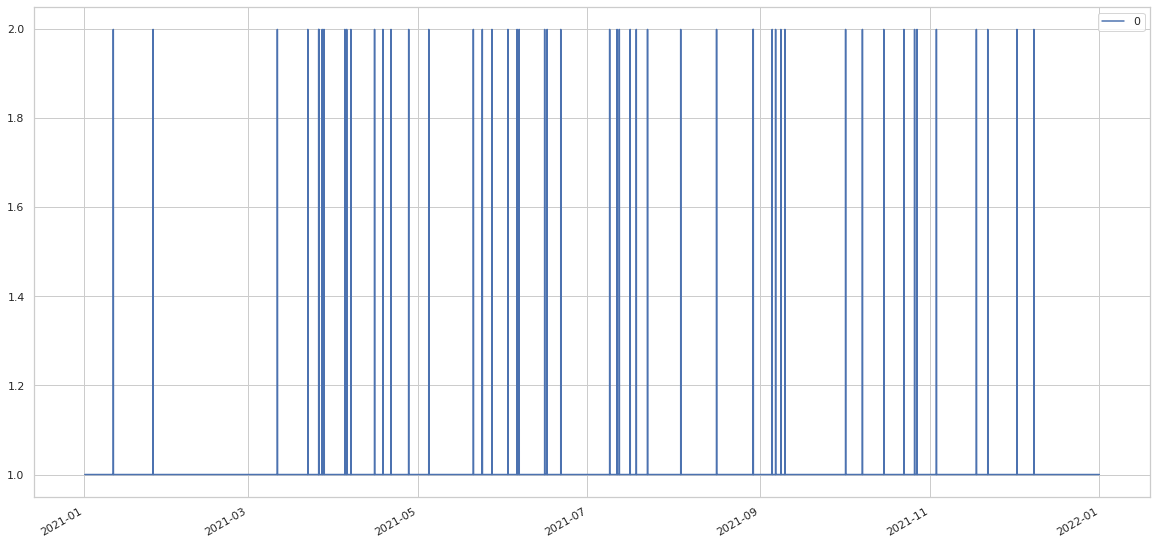

In [ ]:
Created_time = []
dateA = datetime.datetime.strptime('01/01/2021 12:00:00 AM', "%m/%d/%Y %I:%M:%S %p")
dateB = datetime.datetime.strptime('01/01/2022 12:00:00 AM', "%m/%d/%Y %I:%M:%S %p")
for index in df['created_date'].index:
    date = datetime.datetime.strptime(df['created_date'][index], "%m/%d/%Y %I:%M:%S %p")
    if (date >= dateA and date <= dateB):
        Created_time.append(date)
Date_counts = Counter(Created_time)
Created_dates_frame = pd.DataFrame.from_dict(Date_counts, orient='index')
Created_dates_frame.plot(kind='line', figsize = (20,10))
quantity = len(Created_time) # KOLICHESTVO SLUCHEV V 2010 2011
print('Total cases in 2021 were = ' + str(quantity) )

Total cases in 2022 were = 41117


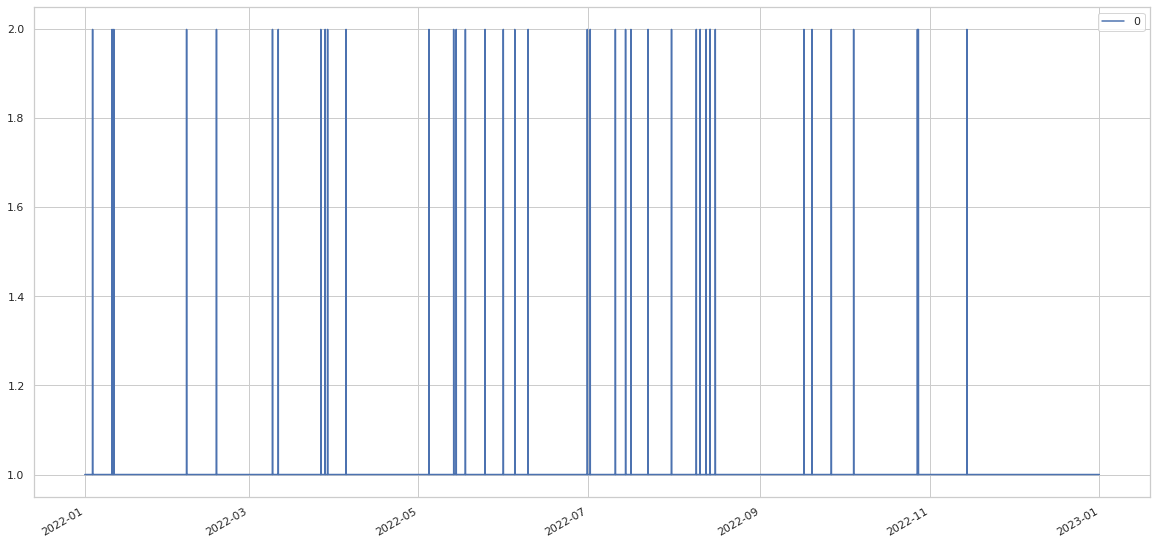

In [ ]:
Created_time = []
dateA = datetime.datetime.strptime('01/01/2022 12:00:00 AM', "%m/%d/%Y %I:%M:%S %p")
dateB = datetime.datetime.strptime('01/01/2023 12:00:00 AM', "%m/%d/%Y %I:%M:%S %p")
for index in df['created_date'].index:
    date = datetime.datetime.strptime(df['created_date'][index], "%m/%d/%Y %I:%M:%S %p")
    if (date >= dateA and date <= dateB):
        Created_time.append(date)
Date_counts = Counter(Created_time)
Created_dates_frame = pd.DataFrame.from_dict(Date_counts, orient='index')
Created_dates_frame.plot(kind='line', figsize = (20,10))
quantity = len(Created_time) # KOLICHESTVO SLUCHEV V 2010 2011
print('Total cases in 2022 were = ' + str(quantity) )

Baseline Accuracy: 0.574135484244671


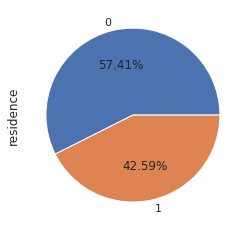

In [ ]:
target = "residence"
df[target].value_counts(normalize=True).plot.pie(autopct="%.2f%%")
print("Baseline Accuracy:", df[target].value_counts(normalize=True).max())

target rate is balanced.

In [ ]:
display(df.info(), df.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138112 entries, 0 to 138621
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   descriptor        138112 non-null  object        
 1   created_date      138112 non-null  object        
 2   location_type     138112 non-null  object        
 3   incident_zip      138112 non-null  object        
 4   incident_address  138112 non-null  object        
 5   city              138112 non-null  object        
 6   status            138112 non-null  object        
 7   borough           138112 non-null  object        
 8   latitude          138112 non-null  float64       
 9   longitude         138112 non-null  float64       
 10  incident_date     138112 non-null  datetime64[ns]
 11  incident_year     138112 non-null  int64         
 12  incident_month    138112 non-null  int64         
 13  boro_code         138112 non-null  int64         
 14  seas

None

descriptor               5
created_date        134444
location_type           54
incident_zip           197
incident_address     66437
city                    91
status                   4
borough                  5
latitude             67852
longitude            67852
incident_date       134444
incident_year            5
incident_month          12
boro_code                5
season                   4
avg_income               5
density                  5
residence                2
dtype: int64

In [ ]:
df.descriptor.unique()

array(['Rat Sighting', 'Mouse Sighting', 'Condition Attracting Rodents',
       'Signs of Rodents', 'Rodent Bite - PCS Only'], dtype=object)

In [ ]:
df.density.mean()

15990.33701633457

In [ ]:
# extract using columns & change column order (!! consier high cardinality)

df_re = df[['city','borough','boro_code','incident_date','incident_year','incident_month','season','avg_income','density','residence']]
df_re

,city,borough,boro_code,incident_date,incident_year,incident_month,season,avg_income,density,residence
0,NEW YORK,MANHATTAN,1,2023-01-18 21:56:24,2023,1,winter,93651,26873,0
1,BROOKLYN,BROOKLYN,3,2023-01-18 07:37:32,2023,1,winter,66937,14698,0
2,STATEN ISLAND,STATEN ISLAND,5,2023-01-18 16:15:20,2023,1,winter,89821,3312,1
3,NEW YORK,MANHATTAN,1,2023-01-24 22:10:45,2023,1,winter,93651,26873,0
4,NEW YORK,MANHATTAN,1,2023-01-18 21:23:56,2023,1,winter,93651,26873,0
...,...,...,...,...,...,...,...,...,...,...
138617,BROOKLYN,BROOKLYN,3,2023-01-18 08:45:32,2023,1,winter,66937,14698,0
138618,BROOKLYN,BROOKLYN,3,2023-01-18 04:21:45,2023,1,winter,66937,14698,1
138619,CORONA,QUEENS,4,2023-01-18 09:36:07,2023,1,winter,73696,8278,1
138620,BROOKLYN,BROOKLYN,3,2023-01-25 10:38:50,2023,1,winter,66937,14698,1


In [ ]:
df_re.nunique()

city                  91
borough                5
boro_code              5
incident_date     134444
incident_year          5
incident_month        12
season                 4
avg_income             5
density                5
residence              2
dtype: int64

In [ ]:
df_re.isna().sum()

city              0
borough           0
boro_code         0
incident_date     0
incident_year     0
incident_month    0
season            0
avg_income        0
density           0
residence         0
dtype: int64

In [ ]:
df_re.duplicated().sum()

2712

In [ ]:
df_clean = df_re.copy()
df_clean = df_clean.drop_duplicates()
df_clean.shape[0]

135400

In [ ]:
df_clean.head(5)

,city,borough,boro_code,incident_date,incident_year,incident_month,season,avg_income,density,residence
0,NEW YORK,MANHATTAN,1,2023-01-18 21:56:24,2023,1,winter,93651,26873,0
1,BROOKLYN,BROOKLYN,3,2023-01-18 07:37:32,2023,1,winter,66937,14698,0
2,STATEN ISLAND,STATEN ISLAND,5,2023-01-18 16:15:20,2023,1,winter,89821,3312,1
3,NEW YORK,MANHATTAN,1,2023-01-24 22:10:45,2023,1,winter,93651,26873,0
4,NEW YORK,MANHATTAN,1,2023-01-18 21:23:56,2023,1,winter,93651,26873,0


## Types of features

Categorical: residence, status, borough, borou_code <br>
Ordinal: 

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135400 entries, 0 to 138621
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   city            135400 non-null  object        
 1   borough         135400 non-null  object        
 2   boro_code       135400 non-null  int64         
 3   incident_date   135400 non-null  datetime64[ns]
 4   incident_year   135400 non-null  int64         
 5   incident_month  135400 non-null  int64         
 6   season          135400 non-null  object        
 7   avg_income      135400 non-null  int64         
 8   density         135400 non-null  int64         
 9   residence       135400 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 11.4+ MB


## Select Model

- target = residence (rat sighting location) <br>
- classification model
- evaluation score: Accuracy (정확도), Recall (재현율), Precision (정밀도), F1 score, roc_auc score
- model: tree based(ordinal encoding), randomforest(기본모델=dt), XGBoost, LGB
- feature importance: PermutationImportance() etc.

### Baseline

Baseline Accuracy: 0.574135484244671


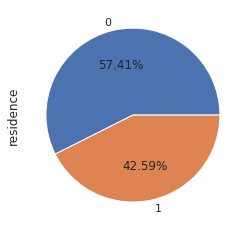

In [ ]:
# 기준모델
target = "residence"
df[target].value_counts(normalize=True).plot.pie(autopct="%.2f%%")
print("Baseline Accuracy:", df[target].value_counts(normalize=True).max())

### Random Forest

In [ ]:
data = df_clean.drop('incident_date', axis=1)

In [ ]:
# split data

target = 'residence'
features = data.drop(columns=target).columns

train, test = train_test_split(data, test_size=0.20, random_state=42)
print(train.shape, test.shape)

# xy_split
X_train,y_train = train[features],train[target]
X_test,y_test = test[features],test[target]
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# 기준모델
base = y_train.mode()
baseline = len(y_train) * [base]
baseline_auc_score = roc_auc_score(y_train, baseline)
print(f'Baseline score: {baseline_auc_score}')

# OrdinalEncoder() 인코딩, RandomForestClassifier() 모델학습
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        max_depth=3
    ),
)
pipe_rf.fit(X_train, y_train)

# auc score
# Cross_val_score()를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score
score = cross_val_score(pipe_rf, X_train, y_train, cv=10, n_jobs=-1, scoring="roc_auc")
print(f'RandomForest score: {score.mean().round(2)}')

# Permuter 정의
permuter = PermutationImportance(
    pipe_rf.named_steps["randomforestclassifier"],
    scoring="roc_auc",
    n_iter=5,
    random_state=42,
)

# test dataset 특성 Ordinal Encoding
X_test_preprocessed = pipe_rf[0].transform(X_test)

# score 다시 계산
permuter.fit(X_test_preprocessed, y_test)

# 특성별 score 확인
eli5.show_weights(
    permuter,
    top=None,    # to see the complete table, enter top=None
    feature_names=X_test.columns.tolist(),
)

(108320, 9) (27080, 9)
(108320, 8) (108320,) (27080, 8) (27080,)
Baseline score: 0.5
RandomForest score: 0.62


Weight,Feature
0.0357 ± 0.0074,city
0.0286 ± 0.0052,boro_code
0.0093 ± 0.0032,density
0.0062 ± 0.0019,incident_year
0.0032 ± 0.0020,avg_income
0.0025 ± 0.0004,borough
0.0012 ± 0.0012,season
0.0010 ± 0.0006,incident_month


In [ ]:
def show_result(pipe):
	print('train auc-score: ', roc_auc_score(y_train, pipe.predict(X_train)))
	print('test auc-score: ', roc_auc_score(y_test, pipe.predict(X_test)))

show_result(pipe_rf)

train auc-score:  0.5727029736318531
test auc-score:  0.5765067071374547


In [ ]:
# accuracy
# Cross_val_score()를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score
score = cross_val_score(pipe_rf, X_train, y_train, cv=10, n_jobs=-1, scoring="accuracy")
print(f'RandomForest score: {score.mean().round(2)}')

# Permuter 정의
permuter = PermutationImportance(
    pipe_rf.named_steps["randomforestclassifier"],
    scoring="accuracy",
    n_iter=5,
    random_state=42,
)

# test dataset 특성 Ordinal Encoding
X_test_preprocessed = pipe_rf[0].transform(X_test)

# score 다시 계산
permuter.fit(X_test_preprocessed, y_test)

# 특성별 score 확인
eli5.show_weights(
    permuter,
    top=None,    # to see the complete table, enter top=None
    feature_names=X_test.columns.tolist(),
)

RandomForest score: 0.61


Weight,Feature
0.0286 ± 0.0026,boro_code
0.0017 ± 0.0018,density
0 ± 0.0000,avg_income
0 ± 0.0000,season
0 ± 0.0000,incident_month
0 ± 0.0000,incident_year
0 ± 0.0000,borough
0 ± 0.0000,city


In [ ]:
y_pred_rf = pipe_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

Confusion Matrix:
[[13190  2156]
 [ 8290  3444]]


In [ ]:
def show_result(pipe):
	print('train auc-score: ', accuracy_score(y_train, pipe.predict(X_train)))
	print('test auc-score: ', accuracy_score(y_test, pipe.predict(X_test)))

show_result(pipe_rf)

train auc-score:  0.6141617429837518
test auc-score:  0.6142540620384047


In [ ]:
# f1
# 기준모델
base = y_train.mode()
baseline = len(y_train) * [base]
baseline_auc_score = f1_score(y_train, baseline)
print(f'Baseline score: {baseline_auc_score}')

# OrdinalEncoder() 인코딩, RandomForestClassifier() 모델학습
pipe_rf = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(
        random_state=42,
        n_jobs=-1,
        max_depth=3
    ),
)
pipe_rf.fit(X_train, y_train)


# Cross_val_score()를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score
score = cross_val_score(pipe_rf, X_train, y_train, cv=10, n_jobs=-1, scoring="f1")
print(f'RandomForest score: {score.mean().round(2)}')

# Permuter 정의
permuter = PermutationImportance(
    pipe_rf.named_steps["randomforestclassifier"],
    scoring="f1",
    n_iter=5,
    random_state=42,
)

# test dataset 특성 Ordinal Encoding
X_test_preprocessed = pipe_rf[0].transform(X_test)

# score 다시 계산
permuter.fit(X_test_preprocessed, y_test)

# 특성별 score 확인
eli5.show_weights(
    permuter,
    top=None,    # to see the complete table, enter top=None
    feature_names=X_test.columns.tolist(),
)

Baseline score: 0.0
RandomForest score: 0.39


Weight,Feature
0.1011 ± 0.0053,boro_code
0.0695 ± 0.0037,density
0 ± 0.0000,avg_income
0 ± 0.0000,season
0 ± 0.0000,incident_month
0 ± 0.0000,incident_year
0 ± 0.0000,borough
0 ± 0.0000,city


In [ ]:
def show_result(pipe):
	print('train f1-score: ', f1_score(y_train, pipe.predict(X_train)))
	print('test f1-score: ', f1_score(y_test, pipe.predict(X_test)))

show_result(pipe_rf)

train f1-score:  0.3909355872923346
test f1-score:  0.39736933194877117


### xgbclassifier
auc socre

In [ ]:
# encoding & modeling → train the model using .fit()
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="accuracy",
    n_estimators=987654321,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
)

watchlist = [(X_train_encoded, y_train), (X_test_encoded, y_test)]

model.fit(
    X_train_encoded,
    y_train,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

# making a pipeline to decrease code errors and simplify the code
pipe_xgb = make_pipeline(
    OrdinalEncoder(),
    XGBClassifier(max_depth=5, random_state=42),
)
pipe_xgb.fit(X_train, y_train)

XGBoostError: ignored

In [ ]:
y_pred = pipe_xgb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[13527  1819]
 [ 8187  3547]]


tp 매우 높음!  -> 불균형 괜춘


In [ ]:
def summarize_results(y_test, y_pred):
    """
    Summarizes the results of a binary classification model.
    """
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    print("Accuracy: {:.2f}".format(acc))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 score: {:.2f}".format(f1))

summarize_results(y_test, y_pred)

Accuracy: 0.63
Precision: 0.66
Recall: 0.30
F1 score: 0.41


### Decision Tree

Suitable for problems with non-linear relationships and a small number of features.

In [ ]:
# Decision Tree
pipe_df = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    DecisionTreeClassifier(random_state=1, criterion="gini", max_depth=10)
)
pipe_df.fit(X_train, y_train)
prediction=pipe_df.predict(X_test)
print('The accuracy of the Decision Tree is',accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.6294313146233382


### LogisticRegression

In [ ]:
# LogisticRegression
pipe_lr = make_pipeline(
    OrdinalEncoder(),
    LogisticRegression(
        random_state=42,
        penalty='l2'
    ),
)
pipe_lr.fit(X_train, y_train)
prediction2=pipe_lr.predict(X_test)
print('The accuracy of the Logistic Regression is',accuracy_score(prediction2,y_test))

The accuracy of the Logistic Regression is 0.6142540620384047


density(=target)에 따라 인구 이동을 도모해야하는지 생각해보자

### 추후 해야할 research
>보건, 도시 환경(지하철, 빈집 여부..) 등 incidents occurred by rats에 관한 column 을 생성한 후 다시 관련여부를 파악하고 모델링 하기.